In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('dataset_linear_regression/Salary_dataset.csv')

In [3]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.drop(columns='Unnamed: 0')

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


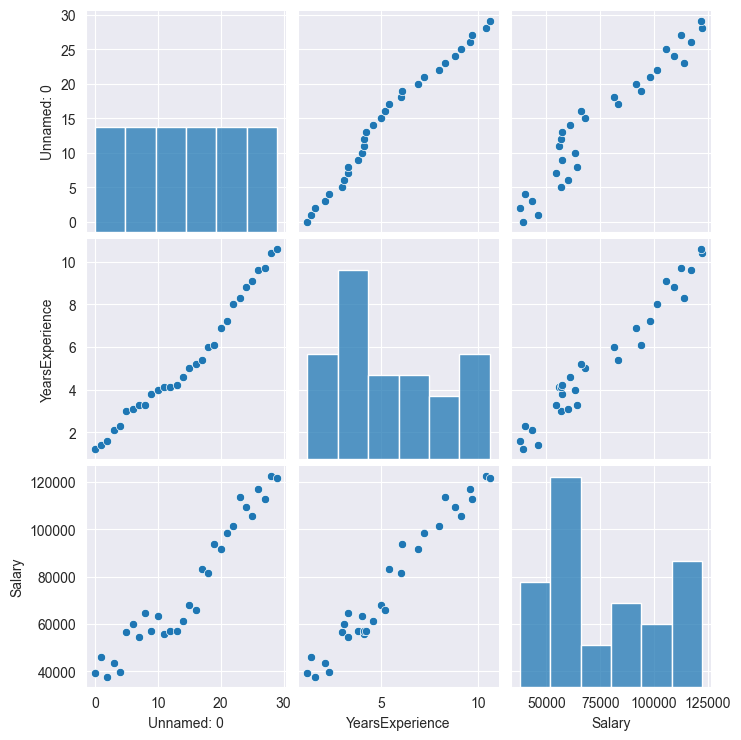

In [5]:
sns.pairplot(df)

In [6]:
x = df['YearsExperience']
y = df['Salary']

In [7]:
x.reset_index()

,index,YearsExperience
0,0,1.2
1,1,1.4
2,2,1.6
3,3,2.1
4,4,2.3
5,5,3.0
6,6,3.1
7,7,3.3
8,8,3.3
9,9,3.8


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
x_train

21     7.2
27     9.7
17     5.4
7      3.3
1      1.4
8      3.3
25     9.1
24     8.8
16     5.2
20     6.9
14     4.6
9      3.8
2      1.6
15     5.0
5      3.0
13     4.2
28    10.4
18     6.0
0      1.2
22     8.0
23     8.3
3      2.1
6      3.1
29    10.6
Name: YearsExperience, dtype: float64

In [10]:
x_train = x_train.values.reshape(-1,1)

In [11]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [12]:
model.coef_

array([9183.01030645])

In [13]:
model.intercept_

26639.62656199267

F(x) = 9569.58688543x + 23437.210463405063


In [14]:
x_test = x_test.values.reshape(-1,1)

In [15]:
y_pred = model.predict(x_test)

In [16]:
y_pred

array([ 64289.96881842, 114796.52550388,  63371.66778778,  47760.55026682,
        64289.96881842,  82655.98943131])

<Axes: >

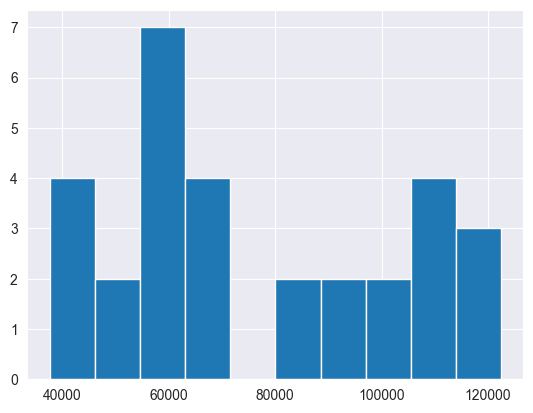

In [17]:
df['Salary'].hist()

In [18]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9218918285694989
53322517.94263401
6217.773459375002


R-squared (R²) Score: This metric indicates how well the model's predictions match the actual data. It ranges from 0 to 1, where 1 indicates perfect predictions.


Mean Squared Error (MSE): This metric measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.


Mean Absolute Error (MAE): This metric measures the average absolute difference between the predicted and actual values. Lower values indicate better model performance.

# Dataset 2

In [19]:
df = pd.read_csv('dataset_linear_regression/avg-household-size.csv')

In [20]:
df

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"
...,...,...,...,...
3215,56,37,2.64,"Sweetwater County, Wyoming"
3216,56,39,2.63,"Teton County, Wyoming"
3217,56,41,2.76,"Uinta County, Wyoming"
3218,56,43,2.34,"Washakie County, Wyoming"


In [21]:
df.avghouseholdsize.unique()

array([2.43, 3.59, 2.77, 3.86, 2.5 , 2.34, 3.56, 2.69, 2.12, 2.26, 2.62,
       2.57, 2.55, 2.98, 4.65, 2.9 , 3.03, 3.26, 3.28, 3.97, 2.4 , 2.49,
       2.15, 3.11, 3.1 , 2.08, 2.32, 2.81, 2.68, 2.6 , 2.61, 2.95, 2.74,
       2.73, 2.52, 2.44, 2.28, 2.37, 2.45, 2.48, 2.42, 2.56, 2.53, 2.65,
       2.36, 2.47, 2.7 , 2.27, 2.35, 2.46, 2.54, 2.64, 2.24, 2.72, 2.51,
       2.59, 2.66, 2.75, 2.86, 2.39, 2.23, 2.31, 2.58, 2.67, 2.33, 2.25,
       2.41, 2.16, 2.8 , 3.67, 3.02, 2.78, 2.14, 3.08, 2.87, 3.04, 2.3 ,
       3.06, 2.82, 3.17, 2.92, 3.61, 3.21, 3.19, 3.35, 2.29, 3.32, 2.38,
       3.24, 2.76, 3.33, 3.16, 2.85, 2.89, 2.63, 3.36, 2.19, 2.21, 2.13,
       3.78, 2.94, 2.18, 1.91, 2.2 , 2.22, 2.71, 3.  , 2.84, 3.18, 2.17,
       3.23, 2.05, 3.05, 2.79, 2.97, 3.14, 2.83, 3.12, 2.88, 3.27, 2.99,
       2.91, 2.96, 1.37, 3.07, 3.22, 3.3 , 2.03, 3.6 , 3.01, 2.09, 2.1 ,
       2.93, 2.07, 2.01, 2.06, 1.93, 2.11, 3.63, 1.99, 3.54, 1.95, 3.93,
       2.04, 2.  , 1.97, 1.94, 3.09, 3.84, 3.43, 3.

In [22]:
df.geography.unique()

array(['Aleutians East Borough, Alaska',
       'Aleutians West Census Area, Alaska',
       'Anchorage Municipality, Alaska', ..., 'Uinta County, Wyoming',
       'Washakie County, Wyoming', 'Weston County, Wyoming'], dtype=object)

In [23]:
encoder = LabelEncoder()

df['geography'] = encoder.fit_transform(df['geography'])

In [24]:
df

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,37
1,2,16,3.59,38
2,2,20,2.77,63
3,2,50,3.86,210
4,2,60,2.50,282
...,...,...,...,...
3215,56,37,2.64,2813
3216,56,39,2.63,2849
3217,56,41,2.76,2916
3218,56,43,2.34,3023


In [25]:
df.geography.unique()

array([  37,   38,   63, ..., 2916, 3023, 3101])

In [26]:
len(encoder.classes_)

3220

In [27]:
x = df.drop(columns='avghouseholdsize')
y = df['avghouseholdsize']

In [28]:
x

,statefips,countyfips,geography
0,2,13,37
1,2,16,38
2,2,20,63
3,2,50,210
4,2,60,282
...,...,...,...
3215,56,37,2813
3216,56,39,2849
3217,56,41,2916
3218,56,43,3023


In [29]:
y

0       2.43
1       3.59
2       2.77
3       3.86
4       2.50
        ... 
3215    2.64
3216    2.63
3217    2.76
3218    2.34
3219    2.27
Name: avghouseholdsize, Length: 3220, dtype: float64

In [30]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

In [31]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([2.53051414, 2.51940457, 2.64398794, ..., 2.55124695, 2.53196838,
       2.58245409])

In [34]:
model.coef_

array([ 1.88932799e-03,  1.09904312e-04, -3.62322896e-06])

In [35]:
model.intercept_

2.4773611084700486

In [36]:
mean_absolute_error(y_test, y_pred)

0.19298679381402245

In [37]:
r2_score(y_test, y_pred)

0.00627937631366271